In [103]:
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

df = pd.read_csv('ADBL_2015.csv')
df

,Date,No of Trans,Max,Min,Close,Volume
0,2015-01-01,20.0,485.0,470.0,479.0,2695.0
1,2015-01-04,17.0,481.0,474.0,478.0,1201.0
2,2015-01-05,17.0,487.0,471.0,487.0,1739.0
3,2015-01-06,32.0,480.0,466.0,475.0,3920.0
4,2015-01-07,37.0,476.0,467.0,476.0,3541.0
...,...,...,...,...,...,...
1580,2022-01-10,337.0,437.5,427.0,429.0,70123.0
1581,2022-01-12,397.0,435.0,422.0,424.0,39598.0
1582,2022-01-13,328.0,426.9,421.5,426.9,37250.0
1583,2022-01-16,443.0,437.0,430.1,435.0,63396.0


<AxesSubplot:title={'center':'Closing Price Plot'}>

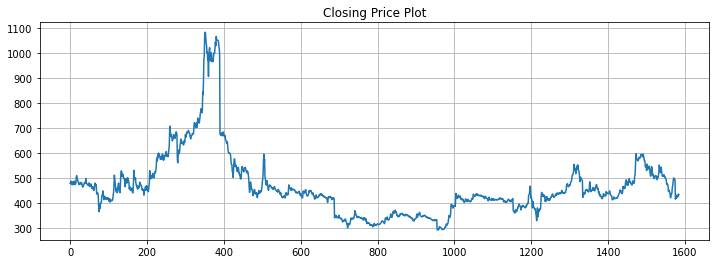

In [113]:
# We plot the results
df["Close"].plot(figsize=(12,4), grid=True, title="Closing Price Plot")

<AxesSubplot:title={'center':'EWM 5 vs EWM 50'}>

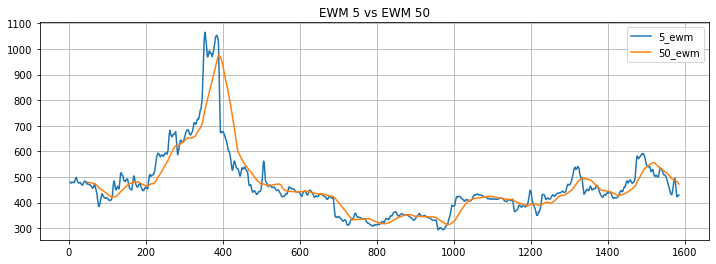

In [68]:
# SMA 5 DAYS AND 50 DAYS

#sma for 5 days period
df["5_ewm"] = df["Close"].rolling(5).mean()

#sma for 50 days
df["50_ewm"] = df["Close"].rolling(50).mean()

# We plot the results
df[["5_ewm","50_ewm"]].plot(figsize=(12,4), grid=True, title="SMA 5 vs SMA 50")

<AxesSubplot:title={'center':'EWM 5 vs EWM 50'}>

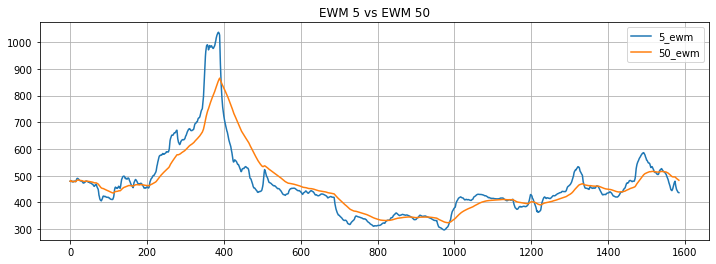

In [69]:
# EWM 5 DAYS AND 50 DAYS

#sma for 5 days period
df["5_ewm"] = df["Close"].ewm(5).mean()

#sma for 50 days
df["50_ewm"] = df["Close"].ewm(50).mean()

# We plot the results
df[["5_ewm","50_ewm"]].plot(figsize=(12,4), grid=True, title="EWM 5 vs EWM 50")

In [66]:
# calculating the on balance volume(obv)

OBV = []
OBV.append(0)

for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])

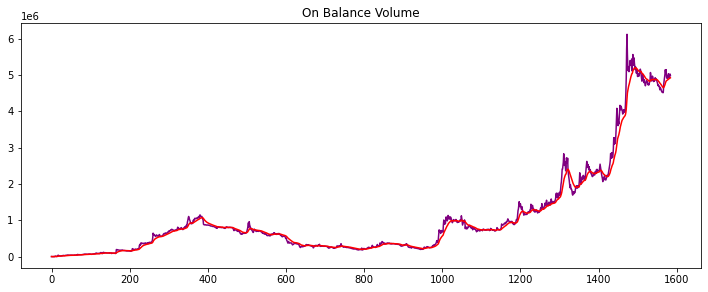

In [67]:
# Store the OBV and OBV Eponential Moving Average (EMA)

df['OBV'] = OBV

df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()

# Create and plot the graph
plt.figure(figsize=(12.2,4.5))

plt.plot(df['OBV'], label = 'EMA OBV', color = 'purple')

plt.plot(df['OBV_EMA'],  label = 'OBV', color = 'red')

plt.title('On Balance Volume')

plt.show()

In [50]:
# CANDLE STICK

open1  = []
open1.append(435)

for i in range(1, len(df.Close)):
    open1.append(df.Close[i-1])

df1 = pd.DataFrame (open, columns = ['open'])

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df1['open'],
                high=df['Max'],
                low=df['Min'],
                close=df['Close'])])

fig.show()


In [63]:
# FUNCTION TO CALCULATE ADX

def ADX(df: pd.DataFrame(), interval: int=14):
  df['-DM'] = df['Min'].shift(1) - df['Min']
  df['+DM'] = df['Max'] - df['Max'].shift(1)
  df['+DM'] = np.where((df['+DM'] > df['-DM']) & (df['+DM']>0), df['+DM'], 0.0)
  df['-DM'] = np.where((df['-DM'] > df['+DM']) & (df['-DM']>0), df['-DM'], 0.0) 
  df['TR_TMP1'] = df['Max'] - df['Min']
  df['TR_TMP2'] = np.abs(df['Max'] - df['Close'].shift(1))
  df['TR_TMP3'] = np.abs(df['Min'] - df['Close'].shift(1))
  df['TR'] = df[['TR_TMP1', 'TR_TMP2', 'TR_TMP3']].max(axis=1)  
  df['TR'+str(interval)] = df['TR'].rolling(interval).sum()  
  df['+DMI'+str(interval)] = df['+DM'].rolling(interval).sum()
  df['-DMI'+str(interval)] = df['-DM'].rolling(interval).sum()  
  df['+DI'+str(interval)] = df['+DMI'+str(interval)] /   df['TR'+str(interval)]*100
  df['-DI'+str(interval)] = df['-DMI'+str(interval)] / df['TR'+str(interval)]*100
  df['DI'+str(interval)+'-'] = abs(df['+DI'+str(interval)] - df['-DI'+str(interval)])
  df['DI'+str(interval)] = df['+DI'+str(interval)] + df['-DI'+str(interval)]  
  df['DX'] = (df['DI'+str(interval)+'-'] / df['DI'+str(interval)])*100  
  df['ADX'+str(interval)] = df['DX'].rolling(interval).mean()
  df['ADX'+str(interval)] =   df['ADX'+str(interval)].fillna(df['ADX'+str(interval)].mean())  
  del df['TR_TMP1'], df['TR_TMP2'], df['TR_TMP3'], df['TR'], df['TR'+str(interval)]
  del df['+DMI'+str(interval)], df['DI'+str(interval)+'-']
  del df['DI'+str(interval)], df['-DMI'+str(interval)]
  del df['+DI'+str(interval)], df['-DI'+str(interval)]
  del df['DX']  
  return df       

In [65]:
df_adx = ADX(df, 14)
print(df_adx)

            Date  No of Trans    Max    Min  Close   Volume  -DM   +DM  \
0     2015-01-01         20.0  485.0  470.0  479.0   2695.0  0.0   0.0   
1     2015-01-04         17.0  481.0  474.0  478.0   1201.0  0.0   0.0   
2     2015-01-05         17.0  487.0  471.0  487.0   1739.0  0.0   6.0   
3     2015-01-06         32.0  480.0  466.0  475.0   3920.0  5.0   0.0   
4     2015-01-07         37.0  476.0  467.0  476.0   3541.0  0.0   0.0   
...          ...          ...    ...    ...    ...      ...  ...   ...   
1580  2022-01-10        337.0  437.5  427.0  429.0  70123.0  0.0   3.5   
1581  2022-01-12        397.0  435.0  422.0  424.0  39598.0  5.0   0.0   
1582  2022-01-13        328.0  426.9  421.5  426.9  37250.0  0.5   0.0   
1583  2022-01-16        443.0  437.0  430.1  435.0  63396.0  0.0  10.1   
1584  2022-01-20        338.0  435.0  427.5  433.0  41039.0  2.6   0.0   

          ADX14  
0     35.160395  
1     35.160395  
2     35.160395  
3     35.160395  
4     35.160395  
...